In [2]:
import pandas as pd
import numpy as np
import requests

import matplotlib.pyplot as plt

In [3]:
#Webscraping Singapore's inflation data from macrotrends.net
df = pd.read_html(requests.get('https://www.macrotrends.net/countries/SGP/singapore/inflation-rate-cpi').text)

#Selecting the correct dataframe
df = df[1] 

#Renaming the columns
df.columns = ['Year', 'Inflation Rate', 'Annual Change']

#Removing the % in the data of Inflation Rate and Annual Change
df = df.replace("%","", regex = True)

#Changing all values in dataframe to numeric data
df['Year'] = pd.to_numeric(df['Year'], errors = 'coerce')
df['Inflation Rate'] = pd.to_numeric(df['Inflation Rate'], errors = 'coerce')
df['Annual Change'] = pd.to_numeric(df['Annual Change'], errors = 'coerce')

#Seeing the dataframe
df.head()

,Year,Inflation Rate,Annual Change
0,2021,2.30,2.49
1,2020,-0.18,-0.75
2,2019,0.57,0.13
3,2018,0.44,-0.14
4,2017,0.58,1.11


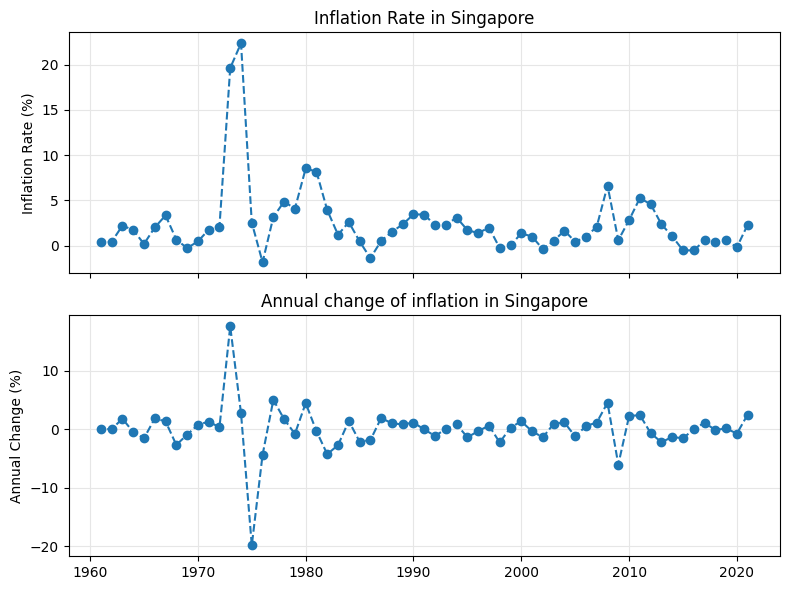

In [4]:
#Using matplotlib.subplots to plot two figures using webscraped data
#Share the same x axis (Year) for both figures 
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6),sharex=True)

#Plotting Figure 1: Inflation Rate in Singapore
ax1.plot(df['Year'],df['Inflation Rate'],linestyle='dashed',marker='o',markersize=6)
ax1.set_title('Inflation Rate in Singapore')
ax1.set_ylabel('Inflation Rate (%)')
ax1.grid(color=(.9,.9,.9))

#Plotting Figure 2: Annual change of inflation in Singapore
ax2.plot(df['Year'],df['Annual Change'],linestyle='dashed',marker='o',markersize=6)
ax2.set_title('Annual change of inflation in Singapore')
ax2.set_ylabel('Annual Change (%)')
ax2.grid(color=(.9,.9,.9))

#Using tight layout to look more presentable (Can be ignored)
plt.tight_layout()